In [1]:
import os

os.chdir("/mnt/aix22301/onj")

In [2]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# load the log file
with open("log/log.txt", "r") as f:
    lines = f.readlines()

# parse the individual lines, group by stream (train,val,hella)
streams = {}
for line in lines:
    step, stream, val = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    streams[stream][int(step)] = float(val)

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))


Min Train Loss: 0.4923


Text(0.5, 1.0, 'Loss')

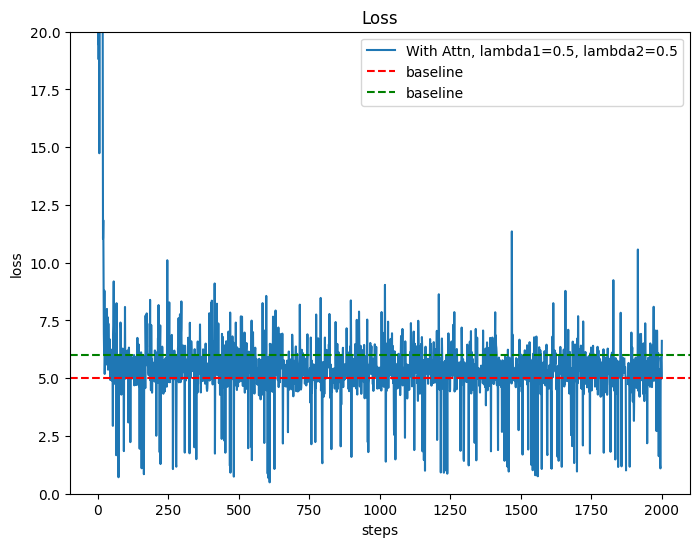

In [3]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# load the log file
with open("log/log.txt", "r") as f:
    lines = f.readlines()

# parse the individual lines, group by stream (train,val,hella)
streams = {}
for line in lines:
    step, stream, val = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    streams[stream][int(step)] = float(val)

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))

# create figure
plt.figure(figsize=(8, 6))

xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'With Attn, lambda1=0.5, lambda2=0.5')
print("Min Train Loss:", min(ys))

plt.axhline(y=5.0, color='r', linestyle='--', label=f"baseline")
plt.axhline(y=6.0, color='g', linestyle='--', label=f"baseline")

plt.xlabel("steps")
plt.ylabel("loss")
plt.ylim(top=20.0, bottom = 0.0)
plt.legend()
plt.title("Loss")

Min Train Loss: 0.3053


Text(0.5, 1.0, 'Loss')

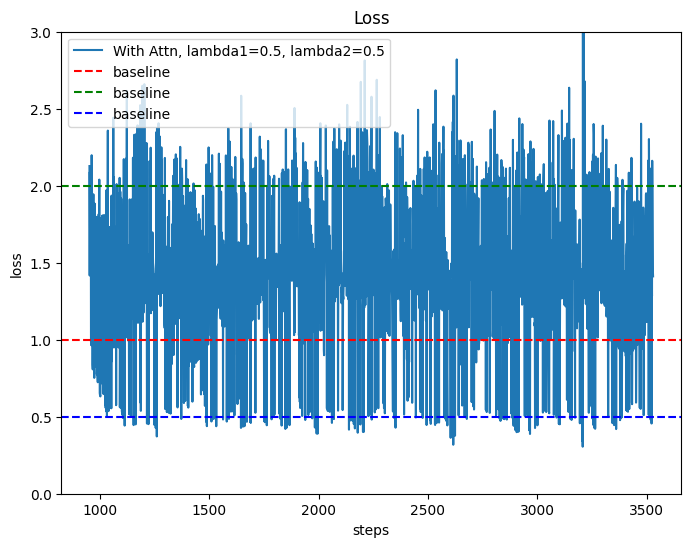

In [103]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# load the log file
with open("log2/log.txt", "r") as f:
    lines = f.readlines()

# parse the individual lines, group by stream (train,val,hella)
streams = {}
for line in lines:
    step, stream, val, stream2, val2 = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    streams[stream][int(step)] = float(val)

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items())[800:])
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))

# create figure
plt.figure(figsize=(8, 6))

xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'With Attn, lambda1=0.5, lambda2=0.5')
print("Min Train Loss:", min(ys))

plt.axhline(y=1.0, color='r', linestyle='--', label=f"baseline")
plt.axhline(y=2.0, color='g', linestyle='--', label=f"baseline")
plt.axhline(y=0.5, color='b', linestyle='--', label=f"baseline")

plt.xlabel("steps")
plt.ylabel("loss")
plt.ylim(top=3.0, bottom = 0.0)
plt.legend()
plt.title("Loss")

Min Train Loss: 0.3633


0.03999951908667141

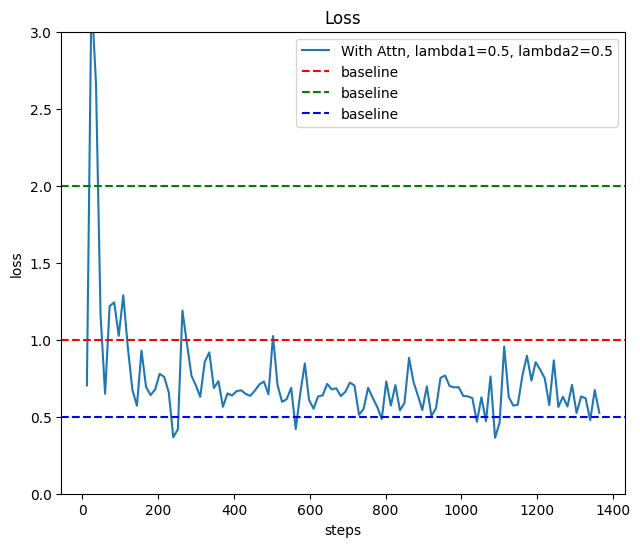

In [15]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir("/mnt/aix22301/onj")

# load the log file
with open("./log/log_time_2024-07-30_13-08-05_lr_0.04_batch_1_epochs_100_lambda1_0.0_lambda2_1.0_patch3d_(8, 8, 4)_patch2d_(64, 64)_embed_2048_head_8_width2d_2048_width3d_512/log.txt", "r") as f:
    lines = f.readlines()

# parse the individual lines, group by stream (train,val,hella)
streams = {}
streams2 = {}
for line in lines:
    step, stream, val, stream2, val2 = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
        streams2[stream2] = {}
    streams[stream][int(step)] = float(val)
    streams2[stream2][int(step)] = float(val2[1: -1])

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items())[0:155])
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))


streams2_xy = {}
for k, v in streams2.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams2_xy[k] = list(zip(*xy))

# create figure
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'With Attn, lambda1=0.5, lambda2=0.5')
print("Min Train Loss:", min(ys))

plt.axhline(y=1.0, color='r', linestyle='--', label=f"baseline")
plt.axhline(y=2.0, color='g', linestyle='--', label=f"baseline")
plt.axhline(y=0.5, color='b', linestyle='--', label=f"baseline")

plt.xlabel("steps")
plt.ylabel("loss")
plt.ylim(top=3.0, bottom = 0.0)
plt.legend()
plt.title("Loss")

xs, ys = streams2_xy["lr"] 
np.mean(ys)


In [ ]:
# TODO: batch gradient descent
# TODO: accuracy plot
# TODO: validation set
# TODO: check dataset change MDCT order in depth